# 0. Import Packages

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Various paths
DATA_DIR = '../data/nlp-getting-started/'
TRAIN_PATH = DATA_DIR + 'train.csv'
TEST_PATH = DATA_DIR + 'test.csv'

# 1. Data Exploration

## 1.1 Training Data Analysis

In [3]:
train = pd.read_csv(TRAIN_PATH)

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train.target.value_counts().to_dict()

{0: 4342, 1: 3271}

In [6]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

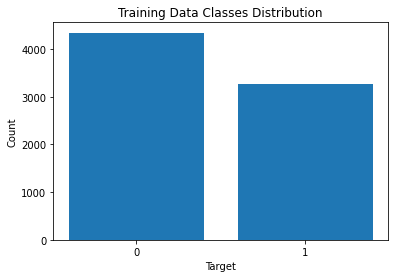

In [7]:
def plot_class_distributions(train_data: pd.DataFrame, column_name: str):
    counts = train_data.target.value_counts().to_dict()
    x_arr = [0, 1]
    y_arr = list(map(lambda c: counts.get(c, 0), x_arr))
    
    fig, ax = plt.subplots()
    ax.bar(x_arr, y_arr)
    ax.set_xlabel('Target')
    ax.set_ylabel('Count')
    ax.set_xticks(x_arr)
    ax.set_title('Training Data Classes Distribution')
    
    plt.show()

plot_class_distributions(train, 'target')

## 1.2 Prepare datasets

In [8]:
X, y = train['text'].tolist(), train['target'].tolist()

# Train & Dev dataset splitting
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=1)

In [9]:
print('Training dataset size:', len(X_train))
print('Dev dataset size:', len(X_dev))

Training dataset size: 6090
Dev dataset size: 1523


# 2. Data Pre-processing

Since the input data is textual data, it should be converted to numeric vectors first before feeding into models.

# 3. Model selection

## 3.1 Baseline Model: TF-IDF + Logistic Regression

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [11]:
vectorizer = TfidfVectorizer(max_features=300)
vectorizer.fit(X)

TfidfVectorizer(max_features=300)

In [12]:
def pre_process(sents):
    return vectorizer.transform(sents)

In [13]:
lr_model = LogisticRegression(max_iter=100)
X_train_preprocessed = pre_process(X_train)
lr_model.fit(X_train_preprocessed, y_train)
lr_model.score(X_train_preprocessed, y_train)

0.780295566502463

In [14]:
y_pred_train = lr_model.predict(X_train_preprocessed)
y_true_train = y_train
target_names = ['class 0', 'class 1']
print(classification_report(y_true_train, y_pred_train, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.77      0.87      0.82      3460
     class 1       0.79      0.66      0.72      2630

    accuracy                           0.78      6090
   macro avg       0.78      0.77      0.77      6090
weighted avg       0.78      0.78      0.78      6090



In [15]:
input_dim = len(vectorizer.get_feature_names())
input_dim

300

In [16]:
y_pred_dev = lr_model.predict(pre_process(X_dev))
y_true_dev = y_dev
target_names = ['class 0', 'class 1']
print(classification_report(y_true_dev, y_pred_dev, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.76      0.87      0.81       882
     class 1       0.78      0.63      0.70       641

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.76      1523



## 3.2  TF-IDF + Shallow Neural Networks

The model architecture will be:

- Input layer: of shape (300,).
- Dense layer: with ReLU activation.
- Dense layer: with Sigmoid activation.

In [17]:
from tensorflow import keras
from tensorflow.keras import layers as tfl

In [18]:
input_ = X_train_preprocessed.toarray().tolist()

In [33]:
model = keras.Sequential(
    [
        tfl.Input(shape=(input_dim,), dtype='float32'),
        tfl.Dense(units=2, activation='relu', name='layer1'),
        tfl.Dense(units=1, activation='sigmoid', name='layer2'),
    ]
)

model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 2)                 602       
_________________________________________________________________
layer2 (Dense)               (None, 1)                 3         
Total params: 605
Trainable params: 605
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(input_, y_train, epochs=100)

Epoch 1/100
191/191 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.7218
Epoch 2/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4997 - accuracy: 0.7642
Epoch 3/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7736
Epoch 4/100
191/191 [==============================] - 1s 6ms/step - loss: 0.4830 - accuracy: 0.7767
Epoch 5/100
191/191 [==============================] - 1s 3ms/step - loss: 0.4800 - accuracy: 0.7821
Epoch 6/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7829
Epoch 7/100
191/191 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7828
Epoch 8/100
191/191 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7854
Epoch 9/100
191/191 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7887
Epoch 10/100
191/191 [==============================] - 1s 3ms/step - loss: 0.4754 - accura

191/191 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7936
Epoch 82/100
191/191 [==============================] - 0s 977us/step - loss: 0.4744 - accuracy: 0.7920
Epoch 83/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7910
Epoch 84/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4819 - accuracy: 0.7901
Epoch 85/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.7923
Epoch 86/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4767 - accuracy: 0.7883
Epoch 87/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7931
Epoch 88/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7872
Epoch 89/100
191/191 [==============================] - 0s 2ms/step - loss: 0.4746 - accuracy: 0.7921
Epoch 90/100
191/191 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy

## 3.3 GloVe + RNN

Many-to-one RNN with GloVe word embeddings.The model architecture is as follows:

- Input layer
- Embedding layer
- GRU layer
- Dense layer: with Sigmoid activation.

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [37]:
# Build the Embedding Matrix
glove_path = '/home/vagrant/_shared/Models/glove.twitter.27B/glove.twitter.27B.50d.txt'


def get_embedding_matrix(tokenizer, dim=50):
    embedding_index = {}
    with open(glove_path, 'r') as f_in:
        for line in f_in.readlines():
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embedding_index[word] = vector
            
    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index) + 1, dim))
    for word,i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
embedding_matrix = get_embedding_matrix(tokenizer)
X_padded = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_padded, maxlen=100)

# Train & Dev dataset splitting
X_train, X_dev, y_train, y_dev = train_test_split(X_padded, y, test_size=0.2, random_state=1)

In [44]:
embedding_matrix = get_embedding_matrix(tokenizer)

In [73]:
def build_model(embedding_matrix):
    model = keras.Sequential(
        [
            tfl.Embedding(len(tokenizer.word_index) + 1, 50, weights=[embedding_matrix], trainable=False, input_length=100),
            tfl.LSTM(units=100, recurrent_dropout=0.1, name='layer1'),
            tfl.Dense(units=1, activation='sigmoid', name='layer3'),
        ]
    )

    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=0.01),
        loss='binary_crossentropy',
        metrics=['accuracy'],
    )

    model.summary()
    
    
    return model

model = build_model(embedding_matrix)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           1135050   
_________________________________________________________________
layer1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
layer3 (Dense)               (None, 1)                 101       
Total params: 1,195,551
Trainable params: 60,501
Non-trainable params: 1,135,050
_________________________________________________________________


In [74]:
history = model.fit(X_train, np.asarray(y_train), epochs=100)

Epoch 1/100
191/191 [==============================] - 31s 161ms/step - loss: 0.5265 - accuracy: 0.7580
Epoch 2/100
191/191 [==============================] - 33s 171ms/step - loss: 0.4312 - accuracy: 0.8084
Epoch 3/100
191/191 [==============================] - 26s 135ms/step - loss: 0.3914 - accuracy: 0.8307
Epoch 4/100
191/191 [==============================] - 28s 147ms/step - loss: 0.3442 - accuracy: 0.8521
Epoch 5/100
191/191 [==============================] - 28s 145ms/step - loss: 0.2872 - accuracy: 0.8798
Epoch 6/100
191/191 [==============================] - 27s 141ms/step - loss: 0.2368 - accuracy: 0.9030
Epoch 7/100
191/191 [==============================] - 31s 163ms/step - loss: 0.1919 - accuracy: 0.9245
Epoch 8/100
191/191 [==============================] - 37s 192ms/step - loss: 0.1609 - accuracy: 0.9371
Epoch 9/100
191/191 [==============================] - 26s 138ms/step - loss: 0.1443 - accuracy: 0.9470
Epoch 10/100
191/191 [==============================] - 29s 153m

191/191 [==============================] - 30s 159ms/step - loss: 0.0653 - accuracy: 0.9741
Epoch 80/100
191/191 [==============================] - 27s 143ms/step - loss: 0.0715 - accuracy: 0.9711
Epoch 81/100
191/191 [==============================] - 24s 128ms/step - loss: 0.0744 - accuracy: 0.9729
Epoch 82/100
191/191 [==============================] - 30s 157ms/step - loss: 0.0745 - accuracy: 0.9719
Epoch 83/100
191/191 [==============================] - 30s 157ms/step - loss: 0.0761 - accuracy: 0.9716
Epoch 84/100
191/191 [==============================] - 25s 131ms/step - loss: 0.0756 - accuracy: 0.9703
Epoch 85/100
191/191 [==============================] - 26s 139ms/step - loss: 0.0748 - accuracy: 0.9711
Epoch 86/100
191/191 [==============================] - 25s 130ms/step - loss: 0.0731 - accuracy: 0.9732
Epoch 87/100
191/191 [==============================] - 26s 136ms/step - loss: 0.0666 - accuracy: 0.9736
Epoch 88/100
191/191 [==============================] - 26s 134ms/st

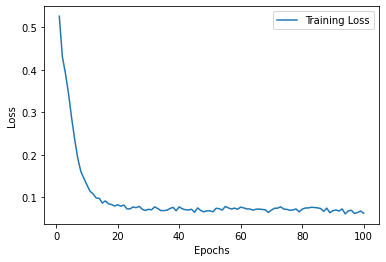

In [75]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

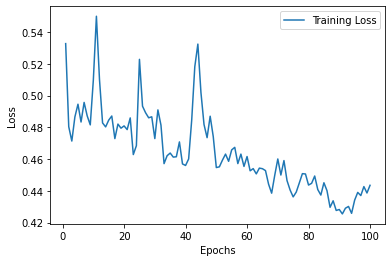

In [51]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

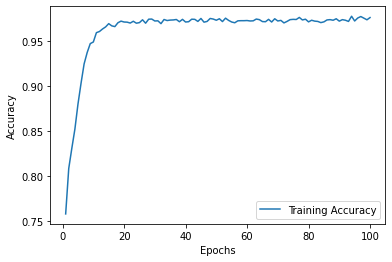

In [76]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

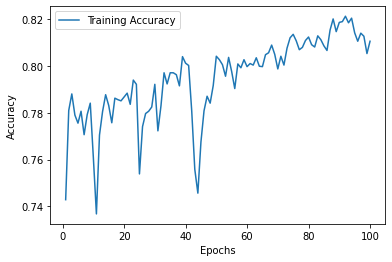

In [54]:
accuracy = history.history['accuracy']
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 4. Predict Test Set

In [55]:
test_df = pd.read_csv(TEST_PATH)

In [56]:
test_df.shape

(3263, 4)

In [57]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [58]:
ids = test_df['id'].tolist()
text = test_df['text'].tolist()
test_data = tokenizer.texts_to_sequences(text)
test_data = pad_sequences(test_data, maxlen=100)

In [77]:
predictions = model.predict(test_data)
target_pred = (predictions >= 0.5).astype(int).flatten().tolist()
pred_df = pd.DataFrame(columns=['id', 'target'], data=np.transpose(np.asarray([ids, target_pred])))

In [78]:
pred_df.to_csv('./predictions_v2.csv', index=False)

In [79]:
pred_df.shape

(3263, 2)

In [81]:
pred_df.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1


# 5. Future Work [Done]

Current approaches achieve approximately an accuracy score of 0.8. Try to improve this to at least 0.9.